# M-values

Various ways to view them. (And also how to use `diyzhl` code.)

**Note** that these show both 4- and 5-minute compartments. For deco calculations you pick one or the other, but this is not deco calculations.

## Step 1: intialize the `tcs` data with ZH-L16C nitrogen values. 

  - Convert Buhlmann's $ a, b $ to Workman's $ M_0, \Delta M $ with `diyzhl.m_b2w()`.
  
  - The `if` siply renames the 4-minute compartment to `tcs[0]` and 5-minute one: to `tcs[1]`.
 

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Constants, Equations, Utilities

plt.ioff ()

## Step 2: A Table

The last two columns are surfacing M-value and M-value at 7 bar (60 msw). Rounded to 4 decimal digits, as usual.

**Note** that the values are in bar. In the literature they are often given in `msw`, i.e. $ bar * 10 $ instead.

In [22]:
zhl16 = Utilities.TableValues.fetchZHL (16, 'N', use_4m_not_5m = False)
zhl16 ['M_surf'] = zhl16 ['M0'] + 1 * zhl16 ['dM']
zhl16 ['M_60m']  = zhl16 ['M0'] + 7 * zhl16 ['dM']
zhl16

,t,b,a,M0,dM,M_surf,M_60m
1,5.0,0.5578,1.1696,2.9624,1.7928,4.7552,15.5120
2,8.0,0.6514,1.0000,2.5352,1.5352,4.0704,13.2816
3,12.5,0.7222,0.8618,2.2465,1.3847,3.6312,11.9394
4,18.5,0.7825,0.7562,2.0342,1.2780,3.3122,10.9802
5,27.0,0.8126,0.6200,1.8506,1.2306,3.0812,10.4648
6,38.3,0.8434,0.5043,1.6900,1.1857,2.8757,9.9899
7,54.3,0.8693,0.4410,1.5914,1.1504,2.7418,9.6442
8,77.0,0.8910,0.4000,1.5223,1.1223,2.6446,9.3784
9,109.0,0.9092,0.3750,1.4749,1.0999,2.5748,9.1742
10,146.0,0.9222,0.3500,1.4344,1.0844,2.5188,9.0252


## 3: M-value vs Tissue compartment & M-value vs Depth

In [3]:
def plotMValues (zhl, ax, desc, **plot_args):
    zhl.plot (y = [ 'M_surf', 'M_60m', ], label = [ 'On surface (1 bar)', 'At 60 msw (7 bar)', ], ax = ax, **plot_args)
    ax.set_title (f'M-values - {desc}', fontsize = 'xx-large')
    ax.set_xlabel ('Tissue Compartments (half-times)', fontsize = 'x-large')
    ax.set_ylabel ('M-value (bar)', fontsize = 'x-large')

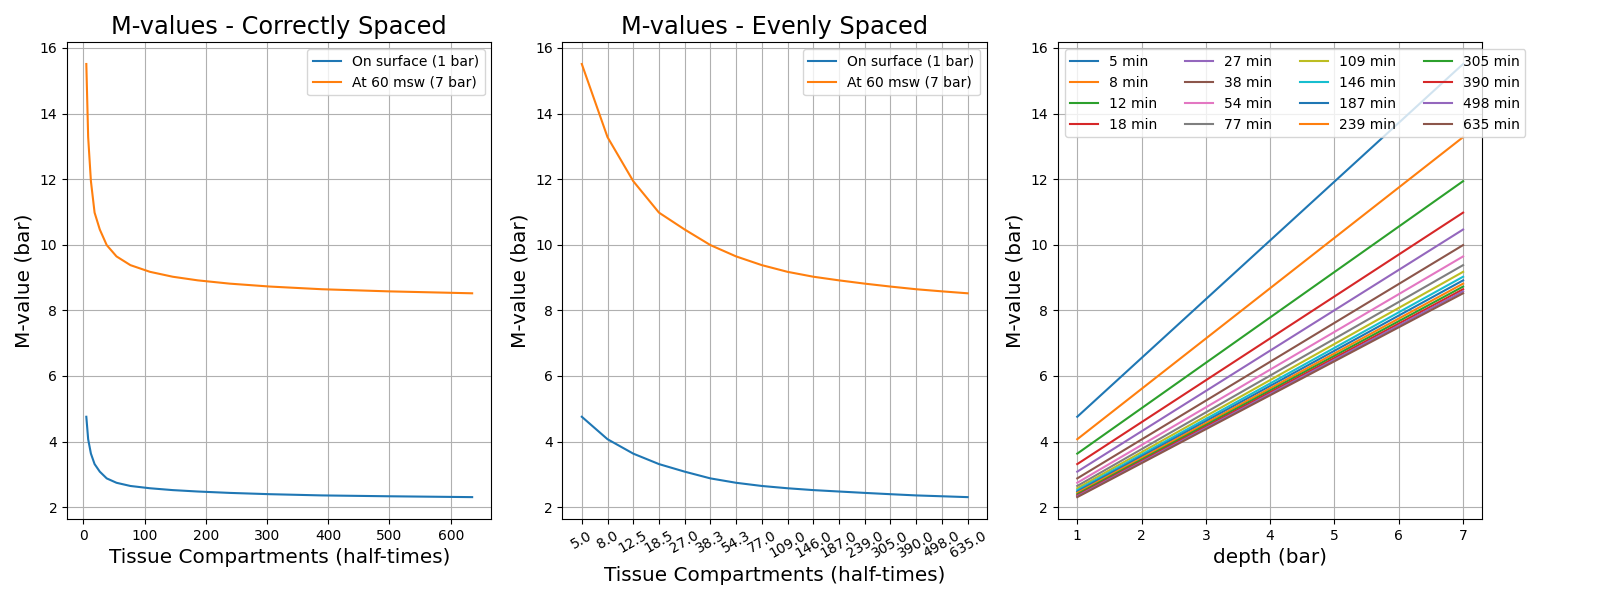

In [4]:
fig, axes = plt.subplots (1,3, figsize = (16,6))

plotMValues (zhl16, axes [0], 'Correctly Spaced', x = 't')
plotMValues (zhl16, axes [1], 'Evenly Spaced')
axes [1].set_xticks (zhl16.index)
axes [1].set_xticklabels (zhl16 ['t'], rotation = 30)

X = np.arange (8)
axes [2].set_xticks (X)
axes [2].set_xticklabels (X)
axes [2].set_ylabel ('M-value (bar)', fontsize = 'x-large')
axes [2].set_xlabel ('depth (bar)'  , fontsize = 'x-large')

for idx, row in zhl16.iterrows ():
    axes [2].plot ([1,7], [ row ['M_surf'], row ['M_60m'], ], label = f'{int (row ["t"])} min')
axes [2].legend (loc = 'upper left', ncol = 4)

for ax in axes: ax.grid ()
fig.tight_layout(); fig.show();

## Tissue compartments as the 3rd dimension


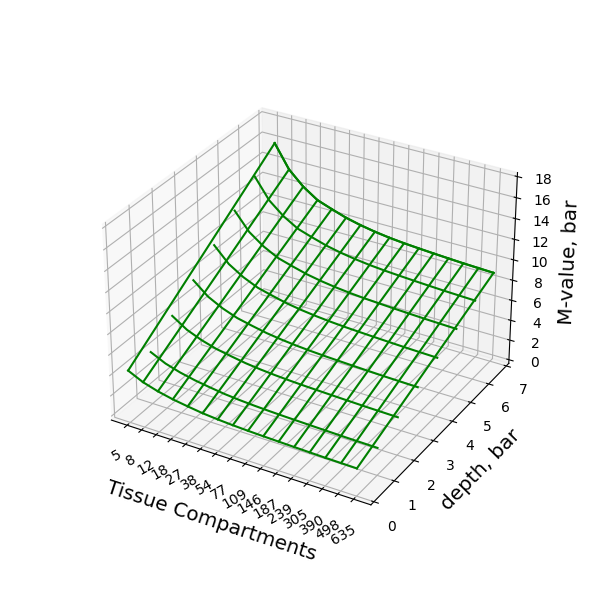

In [34]:
from mpl_toolkits.mplot3d import Axes3D

ts = zhl16.index

fig = plt.figure (figsize = (6,6))
ax = fig.add_subplot (projection = '3d')

ax.set_xticks (ts)
ax.set_xticklabels (zhl16 ['t'].astype (int), rotation = 30)
ax.set_ylim (0,  7)
ax.set_zlim (0, 18)

# For a fixed tissue compartment, show M-values with depth (linear)
for tc_idx, row in zhl16.iterrows ():
    ax.plot (xs = [0,7], ys = [ row ['M_surf'], row ['M_60m'], ], zs = tc_idx, zdir = 'x', c = 'g')

# For a fixed depth, show M-values per tissue (curvature)
for bar in range (1, 8):
    Y = zhl16 ['M0'] + bar * zhl16 ['dM']
    ax.plot (xs = ts, ys = Y, zs = bar, zdir = 'y', c = 'g')

ax.plot( xs = ts, ys = zhl16 ['M_surf'], zs = 0, zdir = "y", c = "g" )
ax.plot( xs = ts, ys = zhl16 ['M_60m'] , zs = 7, zdir = "y", c = "g" )

ax.set_xlabel( "\nTissue Compartments", fontsize = 'x-large')
ax.set_ylabel( "depth, bar", fontsize = 'x-large')
ax.set_zlabel( "M-value, bar", fontsize = "x-large" )
plt.savefig( "mvalues.svg", format = "svg" )
fig.show ()

## 5. Gradient Factors

don't directly translate to percent gas loading because they modify Buhlmann's coefficients rather than Workman's M-values, and Buhlmann to Workman conversion requires the current gas loading in the tissue.

Below, Buhlman's "ceiling" for ZH-L16B tissue compartment 1 is calculated at gas loading equal to Workman's $ M_0 $ at the surface, $ c1 $ is the ceiling at GF = 1 and $ c2 $: at GF 0.75. 


In [27]:
A = Constants.ZHL16N[1]["a"]["B"]
B = Constants.ZHL16N[1]["b"]

(m0, dm) = Equations.m_b2w( a = A, b = B)
c1 = Equations.buhlmann( Pn = m0, an = A, bn = B, gf = 1.   )
c2 = Equations.buhlmann( Pn = m0, an = A, bn = B, gf =  .75 )

print( f'M0 = {m0}' )
print( f'C1 = {c1:.1f}' )
print( f'C2 = {c2:.2f}' )
print( f'C1/C2 = {int( c1/(c2/100.0) )}' )

l = Equations.schreiner( Pi = m0, Palv = Equations.palv( Pamb = c2, Q = 0.79, RQ = 0.9 ), t = 2 )
print( f'L = {l:.2f}' )

print( f'L/M0 = {int( l/(m0/100.0) )}' )

c3 = Equations.buhlmann( Pn = l, an = A, bn = B, gf = 0.75 )
print( f'C3 = {c3:.2f}')

M0 = 3.2401
C1 = 1.0
C2 = 1.32
C1/C2 = 75
L = 2.70
L/M0 = 83
C3 = 1.01


In [32]:
tc_1 = Utilities.TableValues.fetchZHL (16, 'N', use_4m_not_5m = True).loc [1]

c1 = Equations.buhlmann (Pn = tc_1 ['M0'], an = tc_1 ['a'], bn = tc_1 ['b'], gf = 1.  )
c2 = Equations.buhlmann (Pn = tc_1 ['M0'], an = tc_1 ['a'], bn = tc_1 ['b'], gf =  .75)

print (f'M0 = {tc_1 ["M0"]}')
print (f'C1 = {c1:.1f}')
print (f'C2 = {c2:.2f}')
print( f'C1/C2 = {int( c1/(c2/100.0) )}' )

l = Equations.schreiner( Pi = tc_1 ['M0'], Palv = Equations.palv( Pamb = c2, Q = 0.79, RQ = 0.9 ), t = 2 )
print( f'L = {l:.2f}' )

print( f'L/M0 = {int( l/(tc_1 ["M0"]/100.0) )}' )

c3 = Equations.buhlmann( Pn = l, an = tc_1 ['a'], bn = tc_1 ['b'], gf = 0.75 )
print( f'C3 = {c3:.2f}')

M0 = 3.2401
C1 = 1.0
C2 = 1.32
C1/C2 = 75
L = 2.70
L/M0 = 83
C3 = 1.01
